In [1]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
import numpy as np

#### Read the dataset

In [2]:
data= pd.read_csv("mll-leukemia.csv")
data.head()

,AFFX-MurIL2_at,AFFX-MurIL10_at,AFFX-MurIL4_at,AFFX-MurFAS_at,AFFX-hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-DapX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,...,101_at,102_at,103_at,104_at,105_at,106_at,107_at,108_g_at,109_at,class
0,-161.8,34.8,-34.4,179.1,4796.7,12,19.3,-51.6,21.4,-135.8,...,-225.2,242.5,101.7,473.1,-59.9,217.9,275.6,-461.6,1115.5,ALL
1,-231.0,-102.0,-31.0,61.0,8931.0,-33,164.0,-6.0,-34.0,-215.0,...,-175.0,143.0,96.0,301.0,-50.0,242.0,222.0,-330.0,2481.0,ALL
2,-279.0,91.0,-30.0,148.0,13966.0,23,287.0,-114.0,90.0,-52.0,...,-308.0,184.0,-32.0,350.0,-11.0,837.0,174.0,-99.0,376.0,ALL
3,-20.0,115.0,-10.0,29.0,12994.0,29,304.0,-73.0,-27.0,-126.0,...,731.0,106.0,-330.0,-36.0,-190.0,999.0,255.0,-353.0,1603.0,ALL
4,-268.0,128.0,80.0,337.0,10895.0,246,204.0,-311.0,0.0,-286.0,...,182.0,426.0,155.0,607.0,50.0,249.0,1635.0,-780.0,1103.0,ALL


In [3]:
print(len(data)) # total no of rows
print(len(data.columns)) # total number of columns

72
12583


In [4]:
data["class"].unique() # unique class values

array(['ALL', 'MLL', 'AML'], dtype=object)

In [6]:
data2 = data.drop('class', axis=1)
data2.isna().values.any() # checking for missing data

False

## Trying Different Normalization Techniques

#### 1.The maximum absolute scaling

In [7]:
# The maximum absolute scaling :- rescaling each feature between -1 and 1 by dividing every observation by its maximum absolute value.
std1 = []
for colm in data2.columns:
    data2[colm] = data2[colm]/data2[colm].abs().max()
    std1.append(data2[colm].std())

display(data2)

,AFFX-MurIL2_at,AFFX-MurIL10_at,AFFX-MurIL4_at,AFFX-MurFAS_at,AFFX-hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-DapX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,...,100_g_at,101_at,102_at,103_at,104_at,105_at,106_at,107_at,108_g_at,109_at
0,-0.309962,0.086783,-0.223377,0.262996,0.128412,0.045113,0.027690,-0.083630,0.128144,-0.192898,...,0.109784,-0.222970,0.459280,0.083911,0.429700,-0.191374,0.028796,0.109713,-0.137709,0.381237
1,-0.442529,-0.254364,-0.201299,0.089574,0.239091,-0.124060,0.235294,-0.009724,-0.203593,-0.305398,...,0.292917,-0.173267,0.270833,0.079208,0.273388,-0.159744,0.031981,0.088376,-0.098449,0.847915
2,-0.534483,0.226933,-0.194805,0.217327,0.373882,0.086466,0.411765,-0.184765,0.538922,-0.073864,...,0.067827,-0.304950,0.348485,-0.026403,0.317893,-0.035144,0.110612,0.069268,-0.029535,0.128503
3,-0.038314,0.286783,-0.064935,0.042584,0.347861,0.109023,0.436155,-0.118314,-0.161677,-0.178977,...,0.159664,0.723762,0.200758,-0.272277,-0.032698,-0.607029,0.132021,0.101513,-0.105310,0.547847
4,-0.513410,0.319202,0.519481,0.494860,0.291669,0.924812,0.292683,-0.504052,0.000000,-0.406250,...,0.146058,0.180198,0.806818,0.127888,0.551317,0.159744,0.032906,0.650876,-0.232697,0.376965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-0.323755,0.354115,0.123377,0.414097,0.502356,0.518797,0.486370,-0.376013,0.425150,-0.920455,...,0.361745,-0.417822,1.000000,0.181518,0.584015,0.597444,0.053786,-0.224522,-0.517900,0.118250
68,-0.938697,0.109726,-0.740260,0.088106,0.496654,0.187970,0.464849,0.102107,0.263473,-0.288352,...,0.582833,0.126733,0.178030,0.054455,0.504995,0.201278,0.026431,0.047771,-0.225835,0.281955
69,-0.032567,0.104738,0.058442,0.722467,0.382208,0.774436,0.967001,-0.277147,-0.155689,-1.000000,...,0.511204,-0.227723,0.486742,0.058581,0.527702,0.204473,0.004625,0.330016,-0.601134,0.131579
70,-0.264368,0.516209,0.733766,0.654919,0.695267,0.161654,0.657102,-0.074554,0.143713,-0.073864,...,0.396559,-0.233663,0.166667,0.077558,0.129882,0.741214,0.057354,-0.034634,-0.607995,0.419686


In [8]:
def most_influence(data2,std1):
    s=[]
    cols = []
    for v in std1:
        s.append(v)
    s.sort(reverse=True)
    limit = int(input("Enter number:"))
    for i in range(limit):
        cols.append(data2.columns[std1.index(s[i])])
        i+=1
    return(cols)
most_imp = most_influence(data2,std1)
file = pd.DataFrame()
for c in most_imp:
    file[c]=list(data2[c])
file["class"] = list(data["class"])
file.head()

,39763_at,38190_r_at,34419_at,35179_at,1436_at,33377_at,38682_at,38382_at,36769_at,2089_s_at,class
0,0.508643,0.463721,0.5872,0.230669,0.328017,-0.188648,0.309445,0.067753,0.394182,0.350722,ALL
1,-0.489796,0.253023,0.2080,0.537791,-0.099138,-0.437396,0.227247,-0.348315,0.676364,0.285199,ALL
2,0.361345,-0.154419,-0.1280,0.421512,0.043103,-0.153589,0.188323,0.339326,0.476364,0.191336,ALL
3,0.366146,0.509767,0.3920,-0.303779,-0.564655,0.146912,0.398397,0.310112,-0.101818,-0.590253,ALL
4,0.654262,0.445581,0.8000,-0.024709,0.750000,0.908180,0.096737,-0.404494,0.596364,0.536101,ALL


C:\Users\shova\AppData\Local\Temp\ipykernel_1816\3147995716.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(file.corr(), annot=True)


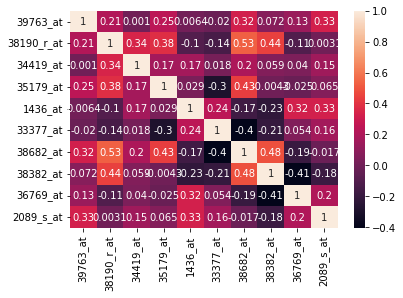

In [9]:
dataplot = sb.heatmap(file.corr(), annot=True)
mp.show()

#### 2.The min-max approach

In [10]:
data = data.replace('?',np.nan) # replaces the 'None' string to null
data2 = data.copy().drop("class",axis=1).astype(float)
std1 = []
for colm in data2.columns: #rescales the feature to a ? hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range.
    data2[colm] = data2[colm].replace(np.nan,data2[colm].mean()) # puts the mean value of the column in an empty cell
    data2[colm] = (data2[colm]-data2[colm].min())/(data2[colm].max()-data2[colm].min())
    std1.append(data2[colm].std())

display(data2)

,AFFX-MurIL2_at,AFFX-MurIL10_at,AFFX-MurIL4_at,AFFX-MurFAS_at,AFFX-hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-DapX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,...,100_g_at,101_at,102_at,103_at,104_at,105_at,106_at,107_at,108_g_at,109_at
0,0.486757,0.421485,0.398667,0.277842,0.093137,0.223242,0.000000,0.808870,0.675269,0.720152,...,0.045010,0.364936,0.494690,0.279961,0.447757,0.448759,0.029566,0.280900,0.866947,0.454833
1,0.393243,0.205371,0.410000,0.107914,0.208295,0.085627,0.213516,0.874106,0.476703,0.619772,...,0.241468,0.390746,0.318584,0.276265,0.296394,0.466312,0.032748,0.263666,0.906419,0.866004
2,0.328378,0.510269,0.413333,0.233094,0.348542,0.256881,0.395013,0.719599,0.921147,0.826362,...,0.000000,0.322365,0.391150,0.193256,0.339490,0.535461,0.111317,0.248232,0.975705,0.232159
3,0.678378,0.548183,0.480000,0.061871,0.321467,0.275229,0.420097,0.778255,0.501792,0.732573,...,0.098519,0.856555,0.253097,0.000000,0.000000,0.218085,0.132708,0.274277,0.899520,0.601626
4,0.343243,0.568720,0.780000,0.505036,0.263001,0.938838,0.272539,0.437768,0.598566,0.529785,...,0.083924,0.574293,0.819469,0.314527,0.565523,0.643617,0.033672,0.718006,0.771446,0.451069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.477027,0.590837,0.576667,0.425899,0.482215,0.608563,0.471743,0.550787,0.853047,0.070976,...,0.315304,0.263753,1.000000,0.356680,0.597186,0.886525,0.054536,0.010932,0.484703,0.223126
68,0.043243,0.436019,0.133333,0.106475,0.476282,0.339450,0.449609,0.972818,0.756272,0.634981,...,0.552479,0.546530,0.231858,0.256809,0.520668,0.666667,0.027202,0.230868,0.778344,0.367359
69,0.682432,0.432859,0.543333,0.728058,0.357205,0.816514,0.966062,0.638054,0.505376,0.000000,...,0.475639,0.362468,0.520354,0.260052,0.542656,0.668440,0.005414,0.458842,0.401020,0.234869
70,0.518919,0.693523,0.890000,0.661871,0.682934,0.318043,0.647337,0.816881,0.684588,0.826362,...,0.352651,0.359383,0.221239,0.274968,0.157432,0.966312,0.058101,0.164309,0.394121,0.488708


In [11]:
def most_influence(data2,std1):
    s=[]
    cols = []
    for v in std1:
        s.append(v)
    s.sort(reverse=True)
    limit = int(input("Enter number:"))
    for i in range(limit):
        cols.append(data2.columns[std1.index(s[i])])
        i+=1
    return(cols)
most_imp = most_influence(data2,std1)
file = pd.DataFrame()
for c in most_imp:
    file[c]=list(data2[c])
file["class"] = list(data["class"])
file.head()

,39318_at,41214_at,38994_at,34168_at,266_s_at,36571_at,33412_at,36638_at,41165_g_at,41166_at,class
0,0.535297,0.620442,0.714442,0.832946,0.781704,0.755963,0.000000,0.584200,0.563736,0.713247,ALL
1,0.685274,0.025733,0.557174,0.805838,0.740855,0.811094,0.030824,0.273667,0.518349,0.577561,ALL
2,0.082217,0.802282,0.130332,0.177473,0.297797,0.409305,0.004684,0.173408,0.611887,0.551113,ALL
3,0.700088,0.008578,0.784073,0.915865,0.715742,0.768380,0.046582,0.239329,0.313404,0.490174,ALL
4,0.751465,0.701223,0.649674,0.657486,0.312716,0.813000,0.002953,0.188860,0.640271,0.759416,ALL


C:\Users\shova\AppData\Local\Temp\ipykernel_1816\3147995716.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(file.corr(), annot=True)


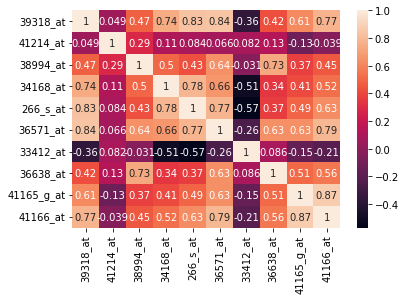

In [12]:
dataplot = sb.heatmap(file.corr(), annot=True)
mp.show()

#### 3.Z score normalization

In [13]:
data = data.replace('?',np.nan) # replaces the 'None' string to null
data2 = data.copy().drop("class",axis=1).astype(float)
std1 = []
for colm in data2.columns:
    data2[colm] = data2[colm].replace(np.nan,data2[colm].mean()) # puts the mean value of the column in an empty cell
    data2[colm] = (data2[colm] - data2[colm].mean())/(data2[colm].std())
    std1.append(data2[colm].std())
display(data2)

,AFFX-MurIL2_at,AFFX-MurIL10_at,AFFX-MurIL4_at,AFFX-MurFAS_at,AFFX-hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-DapX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,...,100_g_at,101_at,102_at,103_at,104_at,105_at,106_at,107_at,108_g_at,109_at
0,0.146021,-0.165512,-1.109950,-0.163493,-1.590362,-1.055403,-2.066865,0.513499,0.096694,0.643737,...,-1.177186,-0.431393,0.446108,-0.106501,-0.112039,-0.532549,-0.640194,-0.168719,0.768425,-0.007295
1,-0.301362,-1.344959,-1.045215,-0.919906,-1.009475,-1.691827,-1.164968,0.908662,-1.029746,0.211221,...,-0.110219,-0.302042,-0.307380,-0.131149,-0.826220,-0.450702,-0.621822,-0.268272,0.958388,2.237408
2,-0.611685,0.319026,-1.026176,-0.362684,-0.302037,-0.899833,-0.398324,-0.027249,1.491527,1.101373,...,-1.421634,-0.644746,0.003103,-0.684647,-0.622879,-0.128272,-0.168224,-0.357424,1.291834,-1.222936
3,1.062767,0.525947,-0.645386,-1.124861,-0.438607,-0.814976,-0.292365,0.328050,-0.887416,0.697255,...,-0.886577,2.032468,-0.587571,-1.973258,-2.224703,-1.608143,-0.044723,-0.206980,0.925188,0.794091
4,-0.540570,0.638029,1.068169,0.847833,-0.733525,2.254002,-0.915653,-1.734420,-0.338429,-0.176513,...,-0.965844,0.617848,1.835706,0.123978,0.443620,0.376042,-0.616485,2.356149,0.308818,-0.027843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.099472,0.758732,-0.093241,0.495566,0.372243,0.726584,-0.074215,-1.049819,1.105203,-2.153415,...,0.290783,-0.938492,2.608125,0.405051,0.593012,1.508681,-0.496034,-1.728141,-1.071156,-1.272252
68,-1.975815,-0.086193,-2.625493,-0.926310,0.342316,-0.517978,-0.167708,1.506605,0.556216,0.276754,...,1.578884,0.478705,-0.678444,-0.260875,0.231980,0.483519,-0.653840,-0.457721,0.342018,-0.484839
69,1.082163,-0.103436,-0.283636,1.840585,-0.258340,1.688291,2.013799,-0.521202,-0.867083,-2.459234,...,1.161563,-0.443761,0.555913,-0.239254,0.335725,0.491786,-0.779628,0.859133,-1.473890,-1.208141
70,0.299889,1.319142,1.696472,1.545962,1.384716,-0.616978,0.667498,0.562028,0.149559,1.101373,...,0.493615,-0.459222,-0.723880,-0.139798,-1.481888,1.880716,-0.475451,-0.842190,-1.507090,0.177641


In [14]:
def most_influence(data2,std1):
    s=[]
    cols = []
    for v in std1:
        s.append(v)
    s.sort(reverse=True)
    limit = int(input("Enter number:"))
    for i in range(limit):
        cols.append(data2.columns[std1.index(s[i])])
        i+=1
    return(cols)
most_imp = most_influence(data2,std1)
file = pd.DataFrame()
for c in most_imp:
    file[c]=list(data2[c])
file["class"] = list(data["class"])
file.head()

,AFFX-LysX-M_at,class
0,0.643737,ALL
1,0.211221,ALL
2,1.101373,ALL
3,0.697255,ALL
4,-0.176513,ALL
